# Лабораторная работа №2

In [171]:
import matplotlib.pyplot as plt
import numpy as np

In [172]:
def cyclic_freq(T: float):
    return 2 * np.pi / T

In [173]:
def period(f: float):
    return 1 / f

In [174]:
def apply_fft(fft_func, y: np.ndarray, **kwards):

    n = len(y)

    xfft = np.arange(n)
    yfft = np.fft.fft_func(y) / n

    if (kwards.get('f0') != None and kwards.get('f1') != None):

        f0 = kwards['f0']   
        f1 = kwards['f1']    

        ids = np.logical_and(xfft >= f0, xfft <= f1)

        return xfft[ids], yfft[ids] 

    return xfft, yfft   

In [175]:
def plot_signal_and_freq(x: np.ndarray, y: np.ndarray, xfft: np.ndarray, yfft: np.ndarray, **kwards):

    fig, axs = plt.subplots(2, 1)

    fig.set_figwidth(8)
    fig.set_figheight(7)

    if (kwards.get('t0') != None and kwards.get('t1') != None):

        t0 = kwards['t0']   
        t1 = kwards['t1']    

        ids = np.logical_and(x >= t0, x <= t1)

        axs[0].plot(x[ids], y[ids])
    else:
        axs[0].plot(x, y)

    axs[1].plot(xfft, np.abs(yfft))
        
    axs[0].set_ylabel('Амплитуда')
    axs[0].set_xlabel('Время, с')

    axs[1].set_ylabel('Амплитуда')
    axs[1].set_xlabel('Частота, Гц')

    plt.show()


In [176]:
def func_x(func, A: float, T: float, start_point: float, end_point: float, sample_rate: int):

    x = np.linspace(start_point, end_point, num = sample_rate, endpoint = False)
    y = np.apply_along_axis(lambda z: func(z, A, cyclic_freq(T)), 0, x)

    return x, y

In [177]:
def cos_func(x: float, A: float, w: float):
    return A * np.cos(w * x)

## Задание 1

In [178]:
SAMPLE_RATE = 5000
A  = 2
f1 = 50
f2 = 150
T1 = period(f1)
T2 = period(f2)

In [179]:
x0, y0 = func_x(cos_func, A, T1, 0, 1, SAMPLE_RATE)
x1, y1 = func_x(cos_func, A, T2, 0, 1, SAMPLE_RATE)

xfft0, yfft0 = apply_fft(np.fft.fft, y0, f0 = 0, f1 = 100)
xfft1, yfft1 = apply_fft(np.fft.fft, y1, f0 = 50, f1 = 200)

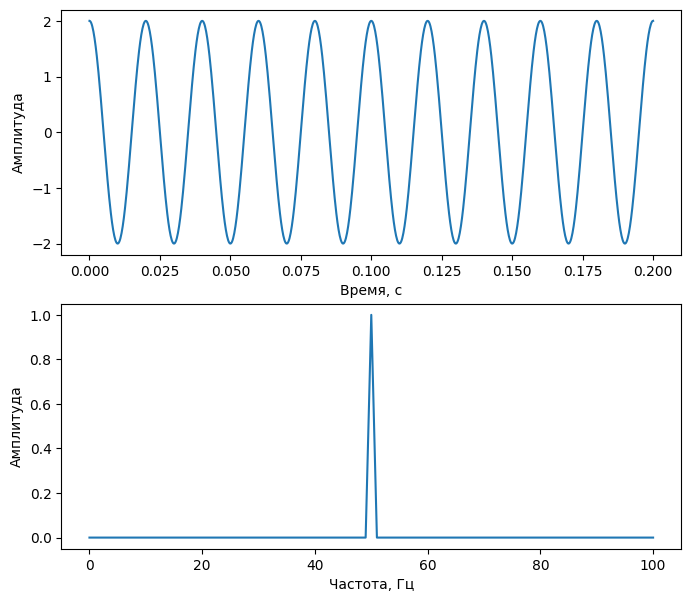

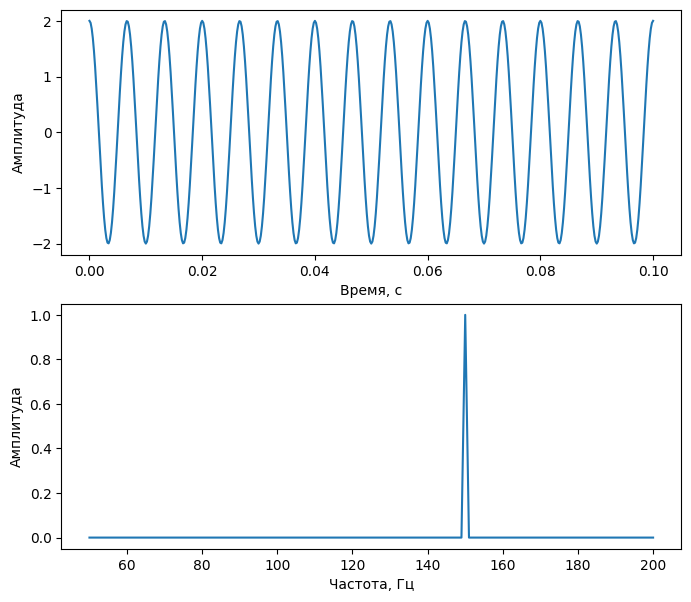

In [180]:
plot_signal_and_freq(x0, y0, xfft0, yfft0, t0 = 0, t1 = 0.2)
plot_signal_and_freq(x1, y1, xfft1, yfft1, t0 = 0, t1 = 0.1)